In [10]:
import numpy as np
import pandas as pd
from pandas import ExcelFile
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
h=pd.read_csv("boston_house_prices.csv")
df=pd.DataFrame(h)
df.head()

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [3]:
df=df.rename(columns=df.iloc[0])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [4]:
df=df.drop(df.index[0])
df=df.reset_index(drop=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [5]:
X=df.iloc[:,0:13]
y=df.iloc[:,13]

In [6]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.10) 

In [8]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr=dtr.fit(X_train, y_train)

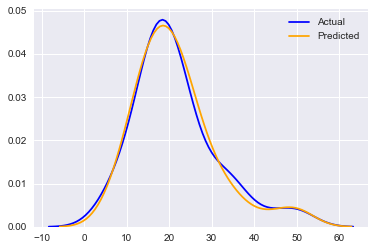

In [11]:
y_predict=dtr.predict(X_test)
df1=pd.DataFrame({"Actual": np.array(y_test).flatten(), "Predicted":y_predict})
#print(df1)
sns.set()
sns.kdeplot(df1["Actual"], color="b")
sns.kdeplot(df1["Predicted"], color="orange")

In [13]:
score=dtr.score(X_test, y_test)
score

0.7804032076394679

In [14]:
from sklearn.tree import export_graphviz
#tree=export_graphviz(dtr, out_file="treeregressor.dot", filled=True, rounded=True, feature_names=X.columns)

In [16]:
from sklearn.model_selection import GridSearchCV

parameters ={"max_depth":[5,7,10],
             "min_samples_split":[3,5,7],
             "min_samples_leaf":[2,3,4],
             "presort":["True","False"]}
GS=GridSearchCV(estimator=DecisionTreeRegressor() ,
                param_grid=parameters)
GS.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 7, 10], 'min_samples_split': [3, 5, 7], 'min_samples_leaf': [2, 3, 4], 'presort': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print(GS.best_params_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 7, 'presort': 'False'}


In [18]:
print(GS.best_estimator_.score(X_test, y_test))

0.8949861976335857


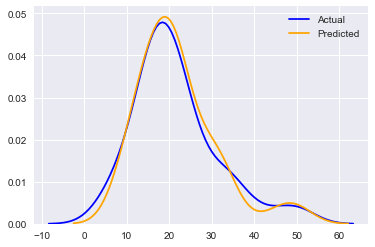

In [19]:
y_predict1=GS.predict(X_test)
df2=pd.DataFrame({"Actual": np.array(y_test).flatten(), "Predicted":y_predict1})
sns.kdeplot(df2["Actual"], color="b")
sns.kdeplot(df2["Predicted"], color="orange")

In [21]:
dtr1=DecisionTreeRegressor(max_depth=5, min_samples_split=7, min_samples_leaf=3)
dtr1=dtr1.fit(X_train, y_train)
from sklearn.tree import export_graphviz
#tree=export_graphviz(dtr1, out_file="treeregressor1.dot", filled=True, rounded=True, feature_names=X.columns)